In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

### Statistics of Supernovae (SNe) using the Transient Name Server (TNS) database

The statistics of TNS can be seen on their website:
https://www.wis-tns.org/stats-maps

To get all classified SNe, one can perform searches on the TNS website and download the results as csv-files using queries like: https://www.wis-tns.org/search?&discovered_period_value=20&discovered_period_units=years&unclassified_at=0&classified_sne=1&include_frb=0&name=&name_like=0&isTNS_AT=all&public=all&ra=&decl=&radius=&coords_unit=arcsec&reporting_groupid%5B%5D=null&groupid%5B%5D=null&classifier_groupid%5B%5D=null&objtype%5B%5D=null&at_type%5B%5D=null&date_start%5Bdate%5D=&date_end%5Bdate%5D=&discovery_mag_min=&discovery_mag_max=&internal_name=&discoverer=&classifier=&spectra_count=&redshift_min=&redshift_max=&hostname=&ext_catid=&ra_range_min=&ra_range_max=&decl_range_min=&decl_range_max=&discovery_instrument%5B%5D=null&classification_instrument%5B%5D=null&associated_groups%5B%5D=null&official_discovery=0&official_classification=0&at_rep_remarks=&class_rep_remarks=&frb_repeat=all&frb_repeater_of_objid=&frb_measured_redshift=0&frb_dm_range_min=&frb_dm_range_max=&frb_rm_range_min=&frb_rm_range_max=&frb_snr_range_min=&frb_snr_range_max=&frb_flux_range_min=&frb_flux_range_max=&num_page=50&display%5Bredshift%5D=1&display%5Bhostname%5D=1&display%5Bhost_redshift%5D=1&display%5Bsource_group_name%5D=1&display%5Bclassifying_source_group_name%5D=1&display%5Bdiscovering_instrument_name%5D=0&display%5Bclassifing_instrument_name%5D=0&display%5Bprograms_name%5D=0&display%5Binternal_name%5D=1&display%5BisTNS_AT%5D=0&display%5Bpublic%5D=1&display%5Bend_pop_period%5D=0&display%5Bspectra_count%5D=1&display%5Bdiscoverymag%5D=1&display%5Bdiscmagfilter%5D=1&display%5Bdiscoverydate%5D=1&display%5Bdiscoverer%5D=1&display%5Bremarks%5D=0&display%5Bsources%5D=0&display%5Bbibcode%5D=0&display%5Bext_catalogs%5D=0

All classified SNe between 2011 and 2022 are downloaded in the folder 20221212_tns_data, ordered by discovery year.

In [2]:
g_report = 'Reporting Group/s'
g_class = 'Classifying Group/s'
g_source = 'Discovery Data Source/s'
years = range(2011, 2022)
groups = ['total', 'ZTF', 'ALeRCE', 'Pan-STARRS', 'GaiaAlerts', 'ATLAS', 'ASAS-SN', 'iPTF', 'Fink', 'AMPEL']
colors = ['k',    'grey', 'navy',   'dodgerblue', 'brown',     'green', 'orange', 'purple', 'pink', 'peru']

def sne_group(df, group):
    ''' returns number of SNe for given group in provided dataframe df '''
    
    if group == 'total':
        return len(df)
    return len(df[df[g_report].str.contains(group) | df[g_class].str.contains(group) | df[g_source].str.contains(group)])

def sne_year(year):
    ''' returns list of numbers of SNe for given year for all groups '''
    
    df = pd.read_csv('20221212_tns_data/'+str(year)+'_tns_search.csv', sep=',', usecols=[g_class, g_report, g_source])
    df[g_report] = df[g_report].astype("string")
    return [sne_group(df, group) for group in groups]
        
df = pd.DataFrame([sne_year(year) for year in years])
df.columns = groups
df.index = list(years)
df

,total,ZTF,ALeRCE,Pan-STARRS,GaiaAlerts,ATLAS,ASAS-SN,iPTF,Fink,AMPEL
2011,1,0,0,0,0,0,0,1,0,0
2012,0,0,0,0,0,0,0,0,0,0
2013,7,6,5,6,5,5,5,5,5,5
2014,9,4,4,4,4,4,4,7,4,4
2015,24,11,11,13,12,11,12,14,11,11
2016,642,19,17,212,218,85,165,209,16,16
2017,747,12,8,292,348,267,159,80,8,9
2018,1503,999,8,379,516,930,268,18,8,8
2019,2138,1809,236,873,662,1493,160,7,7,10
2020,2105,1839,624,1221,631,1688,49,1,106,22


In [3]:
def plot_hist_group(df, name, color, linewidth=1, min_year=2011):
    ''' plot histogram for a group of numbers of SNe per year '''
    
    sn_years = [np.array(df.loc[year][group]*[year]) for year in years]
    plt.hist(sn_years, bins=max(df.index)-min_year+1, range=[min_year, max(df.index)+1], facecolor="None", 
             edgecolor=color, linewidth=linewidth, histtype = 'step', fill = None, label=name)

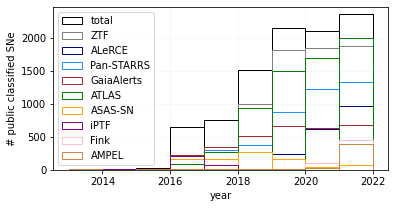

In [4]:
plt.figure(figsize=(6,3))
for group, color in zip(groups, colors):
    plot_hist_group(df, group, color, min_year=2013)

plt.grid(color='grey', alpha= 0.06, lw=1, zorder=-1)
plt.legend(loc=2)
plt.xlabel('year')
plt.ylabel('# public classified SNe')
plt.savefig('sne_statistics.pdf', bbox_inches='tight')
plt.show()